In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


The data used in this analysis was obtained from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. This data comes from a confidential source and is only for educational purposes (not to be used to come to any concrete conclusions.

In [83]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [84]:
# Import the data from CSV to Pandas DataFrame
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [85]:
# Explore the different columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [86]:
# Create a new DataFrame using only the necessary columns and explore descriptive statistics
df1 = df[['ever_married', 'bmi']]
df1.describe(include = 'all')

,ever_married,bmi
count,5110,4909.000000
unique,2,NaN
top,Yes,NaN
freq,3353,NaN
mean,NaN,28.893237
std,NaN,7.854067
min,NaN,10.300000
25%,NaN,23.500000
50%,NaN,28.100000
75%,NaN,33.100000


In [87]:
# Explore the shape of the DataFrame
df1.shape

(5110, 2)

Since the data frame has 5110 entries and there are two unique values for ever_married, the ever_married column has no null values. However, the bmi column does have null values.

In [88]:
# Explore what percent of the bmi columns have null values
df1.isnull().sum()['bmi']/df1.size*100

1.9667318982387476

The percent of null values in the BMI column is ~2%, so they will be dropped.

In [89]:
# Remove null rows
df2 = df1.dropna()

In [90]:
# Separate DataFrame into married and not married
married = df2[df2['ever_married']== 'No']
not_married = df2[df2['ever_married']== 'Yes']

In [91]:
# Obtain descriptive statistics on the married group
married.describe()

,bmi
count,1705.000000
mean,25.214721
std,7.783018
min,10.300000
25%,19.500000
50%,23.500000
75%,29.000000
max,97.600000


In [92]:
# Obtain descriptive statistics on the never married group
not_married.describe()

,bmi
count,3204.000000
mean,30.850749
std,7.159654
min,11.300000
25%,26.100000
50%,29.600000
75%,34.400000
max,92.000000


In [93]:
# Run Levene's test for homogeneity of variance
stats.levene(married['bmi'], not_married['bmi'])

LeveneResult(statistic=9.325138211532005, pvalue=0.00227243243293373)

There is a statistical difference in variances. A Welch's t-test will have to be used.

Text(0, 0.5, 'Frequency')

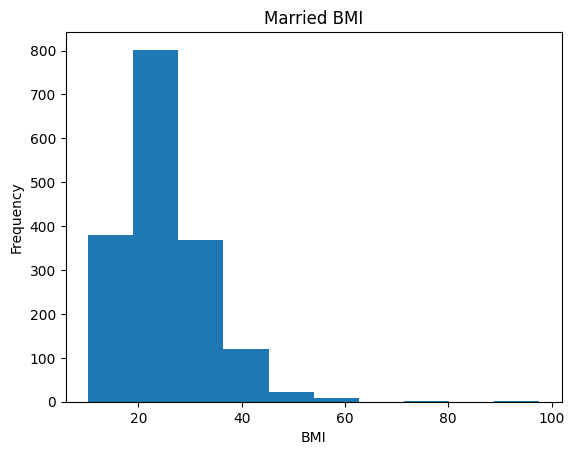

In [94]:
# Plot a histogram of the married patient's BMI
plt.hist( data = married, x = 'bmi')
plt.title('Married BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

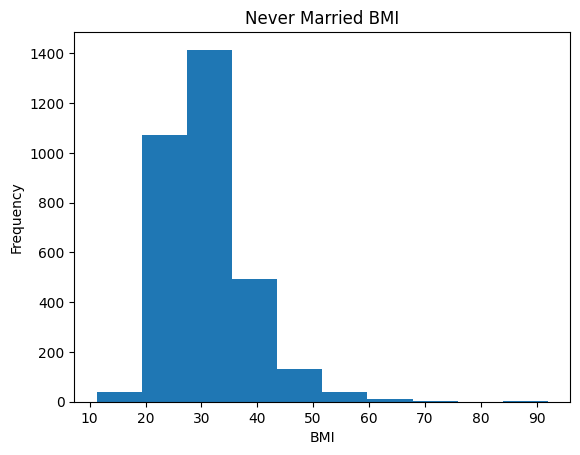

In [95]:
# Plot a histogram of the never married patient's BMI
plt.hist( data = not_married, x = 'bmi')
plt.title('Never Married BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Married')

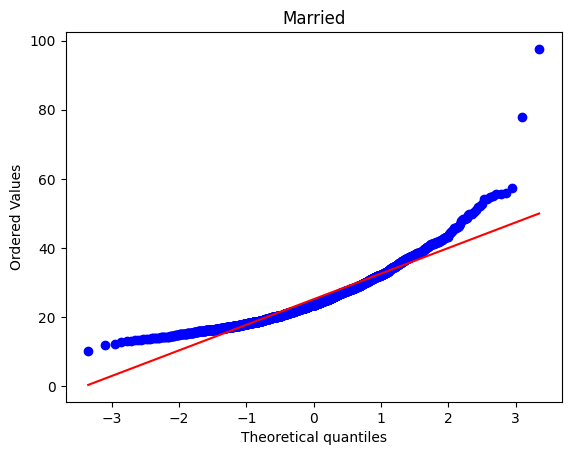

In [96]:
# Plot a q-q plot of married patients to further look at normality
stats.probplot(married['bmi'], dist='norm', plot = plt)
plt.title('Married')

Text(0.5, 1.0, 'Not Married')

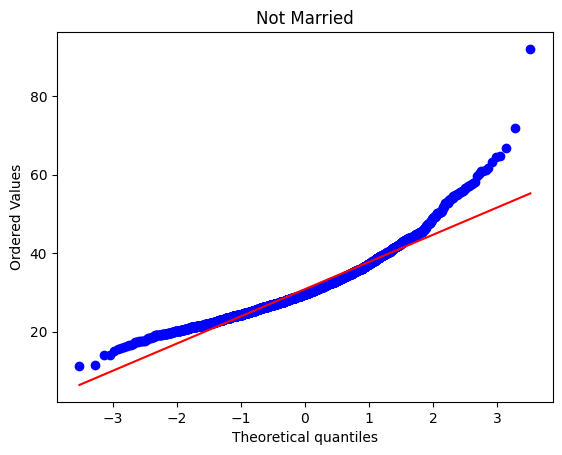

In [97]:
# Plot a q-q plot of never married patients to further look at normality
stats.probplot(not_married['bmi'], dist='norm', plot = plt)
plt.title('Not Married')

In [98]:
# Use a Shapiro-Wilk test to explore normality on the married patients
stats.shapiro(married['bmi'])

ShapiroResult(statistic=0.9036297798156738, pvalue=1.7109067544932968e-31)

In [99]:
# Use a Shapiro-Wilk test to explore normality on the never married patients
stats.shapiro(not_married['bmi'])

ShapiroResult(statistic=0.9349775314331055, pvalue=2.6617560028402604e-35)

A large sample size refutes the need to prove normality in the data.

In [100]:
# Perform a two-tail Welch's t-test
stats.ttest_ind(a = married['bmi'], b = not_married['bmi'], equal_var = False)

TtestResult(statistic=-24.828791740516657, pvalue=1.0337793601110332e-124, df=3235.2107217019943)

There is a statistical difference between married and not married people and their BMI. The BMI of married patients is lower. 